# Notebook to find Hashtag Doublets and Demultiplex multinucleated data using `HTODemux`

**Created by :** Srivalli Kolla

**Created on :** 01 April, 2025

**Modified on :** 01 April, 2025

**University of Würzburg**

Env : scanpy (Python 3.12.2)

# Importing Packages

In [1]:
import scanpy as sc
import pandas as pd
import datetime
import os
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import rcParams

In [2]:
sc.settings.verbosity = 3
sc.logging.print_versions()

plt.rcParams['figure.dpi'] = 300  
plt.rcParams['savefig.dpi'] = 300
plt.vlines

timestamp = datetime.datetime.now().strftime("%d_%m_%y")

-----
anndata     0.11.3
scanpy      1.10.4
-----
Cython                      3.0.12
PIL                         11.1.0
anyio                       NA
arrow                       1.3.0
asttokens                   NA
attr                        25.1.0
attrs                       25.1.0
babel                       2.17.0
certifi                     2025.01.31
charset_normalizer          3.4.1
colorama                    0.4.6
comm                        0.2.2
cycler                      0.12.1
cython                      3.0.12
cython_runtime              NA
dateutil                    2.9.0.post0
debugpy                     1.8.12
decorator                   5.2.1
defusedxml                  0.7.1
executing                   2.1.0
fastjsonschema              NA
fqdn                        NA
h5py                        3.13.0
idna                        3.10
igraph                      0.11.8
ipykernel                   6.29.5
ipywidgets                  8.1.5
isoduration               

/home/gruengroup/srivalli/miniconda3/envs/scanpy/lib/python3.13/site-packages/session_info/main.py:213: UserWarning: The '__version__' attribute is deprecated and will be removed in MarkupSafe 3.1. Use feature detection, or `importlib.metadata.version("markupsafe")`, instead.
  mod_version = _find_version(mod.__version__)


# Importing files

In [3]:
raw_adata = sc.read_h5ad('./Github/Nuclear_hashing_2025/data/demultiplexed_HTODemux_raw.h5ad')
raw_adata

AnnData object with n_obs × n_vars = 41918 × 32285
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_HTO', 'nFeature_HTO', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'ident'
    uns: 'X_name'
    layers: 'logcounts'

In [4]:
raw_adata.obs

,orig.ident,nCount_RNA,nFeature_RNA,nCount_HTO,nFeature_HTO,HTO_maxID,HTO_secondID,HTO_margin,HTO_classification,HTO_classification.global,hash.ID,ident
AAACCAAAGCCAGTGT-1,SeuratProject,14083.0,3886,1960.0,8,TotalSeqB4,TotalSeqB9,0.575627,TotalSeqB4_TotalSeqB9,Doublet,Doublet,Doublet
AAACCAAAGGCGTCCA-1,SeuratProject,7966.0,2771,1928.0,8,TotalSeqB4,TotalSeqB9,0.377318,TotalSeqB4,Singlet,TotalSeqB4,Singlet
AAACCAAAGGTTAGCC-1,SeuratProject,4451.0,2271,1861.0,8,TotalSeqB3,TotalSeqB6,0.094148,Negative,Negative,Negative,Negative
AAACCAAAGGTTAGTT-1,SeuratProject,13944.0,4187,1658.0,8,TotalSeqB5,TotalSeqB6,0.270208,Negative,Negative,Negative,Negative
AAACCAAAGTACCACA-1,SeuratProject,11424.0,3923,1655.0,8,TotalSeqB7,TotalSeqB9,0.107273,Negative,Negative,Negative,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...
TGTGTTGAGCCTATCT-1,SeuratProject,8738.0,3805,2570.0,8,TotalSeqB7,TotalSeqB8,0.052030,TotalSeqB7_TotalSeqB8,Doublet,Doublet,Doublet
TGTGTTGAGCTAACCA-1,SeuratProject,16178.0,4236,1872.0,8,TotalSeqB4,TotalSeqB8,0.949875,TotalSeqB4,Singlet,TotalSeqB4,Singlet
TGTGTTGAGGAGGACC-1,SeuratProject,4898.0,2244,911.0,8,TotalSeqB4,TotalSeqB8,0.164266,Negative,Negative,Negative,Negative
TGTGTTGAGTACGCAC-1,SeuratProject,5921.0,2736,2001.0,8,TotalSeqB4,TotalSeqB8,0.096781,TotalSeqB4,Singlet,TotalSeqB4,Singlet


In [5]:
raw_adata.var

""
Xkr4
Gm1992
Gm19938
Gm37381
Rp1
...
AC124606.1
AC133095.2
AC133095.1
AC234645.1


In [6]:
raw_adata.obs['HTO_classification'].unique()

['TotalSeqB4_TotalSeqB9', 'TotalSeqB4', 'Negative', 'TotalSeqB6', 'TotalSeqB3_TotalSeqB5', ..., 'TotalSeqB5_TotalSeqB6', 'TotalSeqB1_TotalSeqB5', 'TotalSeqB4_TotalSeqB7', 'TotalSeqB5_TotalSeqB9', 'TotalSeqB3_TotalSeqB4']
Length: 37
Categories (37, object): ['Negative', 'TotalSeqB1', 'TotalSeqB1_TotalSeqB3', 'TotalSeqB1_TotalSeqB4', ..., 'TotalSeqB7_TotalSeqB9', 'TotalSeqB8', 'TotalSeqB8_TotalSeqB9', 'TotalSeqB9']

# Adding Metadata

In [7]:
metadata = pd.read_csv('./Github/Nuclear_hashing_2025/data/Nuclei_hashing_metadata.csv', sep = ';')
metadata

,Sample,Sample-ID,Mouse-ID,Sex,Group,Ref hashtag,Nuclei Purification Method after Hashing,assigned_hashtag
0,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_10,10,24-2455,Male,MCMV,TotalSeqB1,Standard,Hash1
1,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_11,11,26-2457,Male,MCMV,TotalSeqB9,Standard,Hash9
2,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_12,12,25-2456,Male,MCMV,TotalSeqB3,Magnetic Beads,Hash3
3,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_13,13,#5_DZHI_12.07.2023,Male,MCMV,TotalSeqB4,Magnetic Beads,Hash4
4,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_14,14,9_4893,Female,noninf,TotalSeqB5,Magnetic Beads,Hash5
5,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_15,15,2_1219,Female,noninf,TotalSeqB6,Standard,Hash6
6,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_16,16,99_0939,Female,noninf,TotalSeqB7,Magnetic Beads,Hash7
7,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_17,17,20_2418,Female,noninf,TotalSeqB8,Standard,Hash8


In [8]:
metadata = metadata.set_index('assigned_hashtag')
metadata

,Sample,Sample-ID,Mouse-ID,Sex,Group,Ref hashtag,Nuclei Purification Method after Hashing
assigned_hashtag,,,,,,,
Hash1,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_10,10,24-2455,Male,MCMV,TotalSeqB1,Standard
Hash9,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_11,11,26-2457,Male,MCMV,TotalSeqB9,Standard
Hash3,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_12,12,25-2456,Male,MCMV,TotalSeqB3,Magnetic Beads
Hash4,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_13,13,#5_DZHI_12.07.2023,Male,MCMV,TotalSeqB4,Magnetic Beads
Hash5,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_14,14,9_4893,Female,noninf,TotalSeqB5,Magnetic Beads
Hash6,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_15,15,2_1219,Female,noninf,TotalSeqB6,Standard
Hash7,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_16,16,99_0939,Female,noninf,TotalSeqB7,Magnetic Beads
Hash8,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_17,17,20_2418,Female,noninf,TotalSeqB8,Standard


Modifiying the assigned_hashtag names to match the metadata

In [9]:
raw_adata.obs['HTO_classification'] = raw_adata.obs['HTO_classification'].str.replace('TotalSeqB', 'Hash')
raw_adata.obs

,orig.ident,nCount_RNA,nFeature_RNA,nCount_HTO,nFeature_HTO,HTO_maxID,HTO_secondID,HTO_margin,HTO_classification,HTO_classification.global,hash.ID,ident
AAACCAAAGCCAGTGT-1,SeuratProject,14083.0,3886,1960.0,8,TotalSeqB4,TotalSeqB9,0.575627,Hash4_Hash9,Doublet,Doublet,Doublet
AAACCAAAGGCGTCCA-1,SeuratProject,7966.0,2771,1928.0,8,TotalSeqB4,TotalSeqB9,0.377318,Hash4,Singlet,TotalSeqB4,Singlet
AAACCAAAGGTTAGCC-1,SeuratProject,4451.0,2271,1861.0,8,TotalSeqB3,TotalSeqB6,0.094148,Negative,Negative,Negative,Negative
AAACCAAAGGTTAGTT-1,SeuratProject,13944.0,4187,1658.0,8,TotalSeqB5,TotalSeqB6,0.270208,Negative,Negative,Negative,Negative
AAACCAAAGTACCACA-1,SeuratProject,11424.0,3923,1655.0,8,TotalSeqB7,TotalSeqB9,0.107273,Negative,Negative,Negative,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...
TGTGTTGAGCCTATCT-1,SeuratProject,8738.0,3805,2570.0,8,TotalSeqB7,TotalSeqB8,0.052030,Hash7_Hash8,Doublet,Doublet,Doublet
TGTGTTGAGCTAACCA-1,SeuratProject,16178.0,4236,1872.0,8,TotalSeqB4,TotalSeqB8,0.949875,Hash4,Singlet,TotalSeqB4,Singlet
TGTGTTGAGGAGGACC-1,SeuratProject,4898.0,2244,911.0,8,TotalSeqB4,TotalSeqB8,0.164266,Negative,Negative,Negative,Negative
TGTGTTGAGTACGCAC-1,SeuratProject,5921.0,2736,2001.0,8,TotalSeqB4,TotalSeqB8,0.096781,Hash4,Singlet,TotalSeqB4,Singlet


In [10]:
raw_adata.obs = raw_adata.obs.join(metadata, on="HTO_classification", how="left")

raw_adata.obs

,orig.ident,nCount_RNA,nFeature_RNA,nCount_HTO,nFeature_HTO,HTO_maxID,HTO_secondID,HTO_margin,HTO_classification,HTO_classification.global,hash.ID,ident,Sample,Sample-ID,Mouse-ID,Sex,Group,Ref hashtag,Nuclei Purification Method after Hashing
AAACCAAAGCCAGTGT-1,SeuratProject,14083.0,3886,1960.0,8,TotalSeqB4,TotalSeqB9,0.575627,Hash4_Hash9,Doublet,Doublet,Doublet,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAACCAAAGGCGTCCA-1,SeuratProject,7966.0,2771,1928.0,8,TotalSeqB4,TotalSeqB9,0.377318,Hash4,Singlet,TotalSeqB4,Singlet,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_13,13.0,#5_DZHI_12.07.2023,Male,MCMV,TotalSeqB4,Magnetic Beads
AAACCAAAGGTTAGCC-1,SeuratProject,4451.0,2271,1861.0,8,TotalSeqB3,TotalSeqB6,0.094148,Negative,Negative,Negative,Negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAACCAAAGGTTAGTT-1,SeuratProject,13944.0,4187,1658.0,8,TotalSeqB5,TotalSeqB6,0.270208,Negative,Negative,Negative,Negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAACCAAAGTACCACA-1,SeuratProject,11424.0,3923,1655.0,8,TotalSeqB7,TotalSeqB9,0.107273,Negative,Negative,Negative,Negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TGTGTTGAGCCTATCT-1,SeuratProject,8738.0,3805,2570.0,8,TotalSeqB7,TotalSeqB8,0.052030,Hash7_Hash8,Doublet,Doublet,Doublet,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TGTGTTGAGCTAACCA-1,SeuratProject,16178.0,4236,1872.0,8,TotalSeqB4,TotalSeqB8,0.949875,Hash4,Singlet,TotalSeqB4,Singlet,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_13,13.0,#5_DZHI_12.07.2023,Male,MCMV,TotalSeqB4,Magnetic Beads
TGTGTTGAGGAGGACC-1,SeuratProject,4898.0,2244,911.0,8,TotalSeqB4,TotalSeqB8,0.164266,Negative,Negative,Negative,Negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TGTGTTGAGTACGCAC-1,SeuratProject,5921.0,2736,2001.0,8,TotalSeqB4,TotalSeqB8,0.096781,Hash4,Singlet,TotalSeqB4,Singlet,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_13,13.0,#5_DZHI_12.07.2023,Male,MCMV,TotalSeqB4,Magnetic Beads


# QC check

## Mt and Ribo Genes

In [11]:
raw_adata.var['mt'] = raw_adata.var_names.str.startswith('mt-') 
raw_adata.var['ribo'] = raw_adata.var_names.str.startswith(("Rps","Rpl"))
raw_adata.var

,mt,ribo
Xkr4,False,False
Gm1992,False,False
Gm19938,False,False
Gm37381,False,False
Rp1,False,False
...,...,...
AC124606.1,False,False
AC133095.2,False,False
AC133095.1,False,False
AC234645.1,False,False


In [12]:
ribo_counts = raw_adata.var['ribo'].value_counts()

mt_counts = raw_adata.var['mt'].value_counts()

print("Counts of Ribosomal (ribo) Genes:")
print("False:", ribo_counts.get(False, 0))
print("True:", ribo_counts.get(True, 0))
print("\nCounts of Mitochondrial (mt) Genes:")
print("False:", mt_counts.get(False, 0))
print("True:", mt_counts.get(True, 0))

Counts of Ribosomal (ribo) Genes:
False: 32184
True: 101

Counts of Mitochondrial (mt) Genes:
False: 32272
True: 13


### Calculating QC metrics per cell

In [13]:
sc.pp.calculate_qc_metrics(raw_adata, qc_vars = ['mt','ribo'], percent_top = None, log1p = False, inplace = True)
raw_adata

AnnData object with n_obs × n_vars = 41918 × 32285
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_HTO', 'nFeature_HTO', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'ident', 'Sample', 'Sample-ID', 'Mouse-ID', 'Sex', 'Group', 'Ref hashtag', 'Nuclei Purification Method after Hashing', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'X_name'
    layers: 'logcounts'

### Visualization of qc metrics

Text(0.5, 1.0, 'Mt and Ribo percentages - Before filtering')

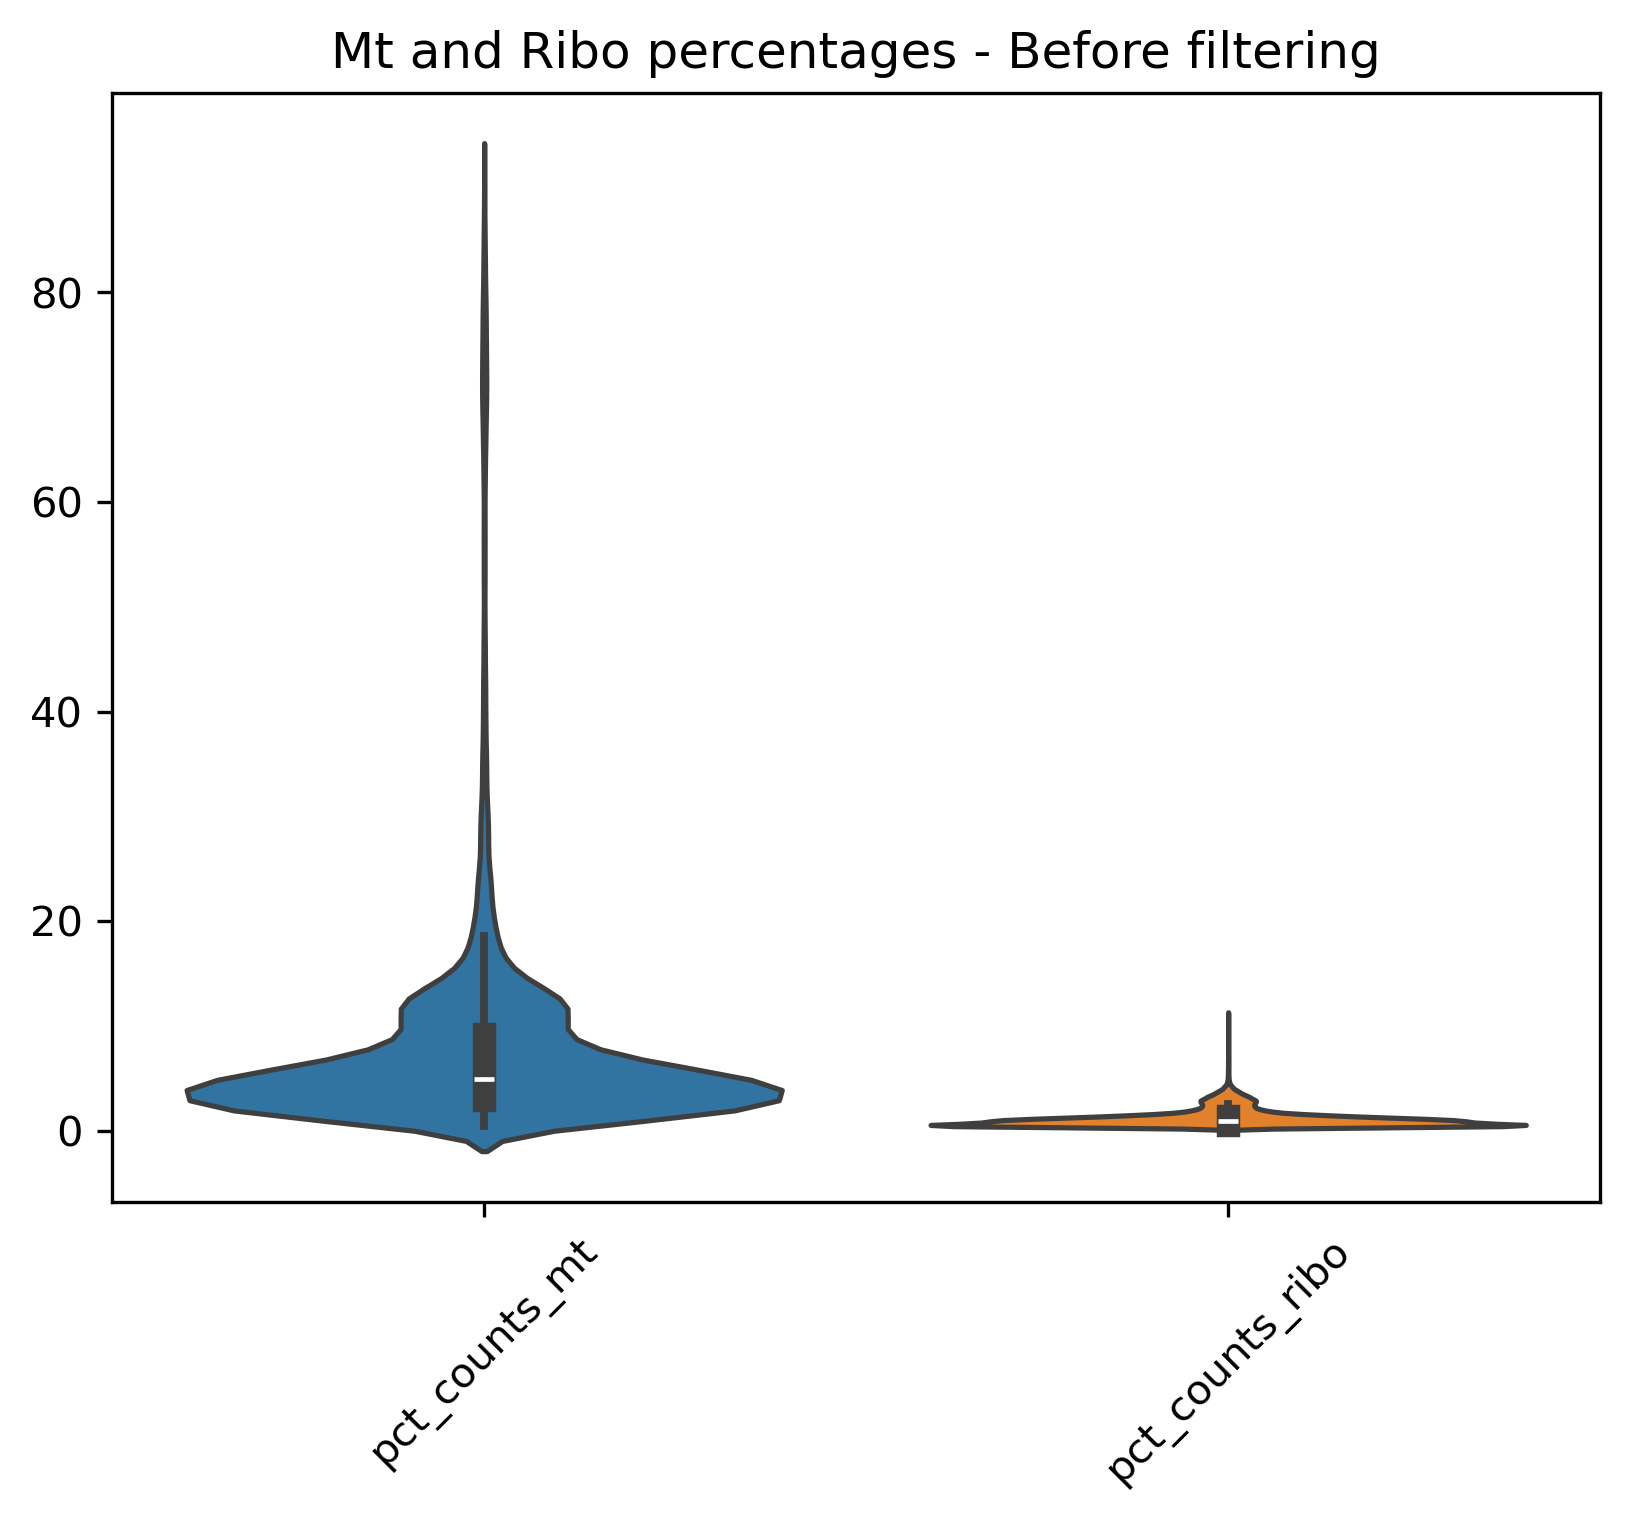

In [14]:
variables = ['pct_counts_mt', 'pct_counts_ribo']

sb.violinplot(data=raw_adata.obs[variables])
plt.xticks(rotation=45)
plt.title(f'Mt and Ribo percentages - Before filtering')

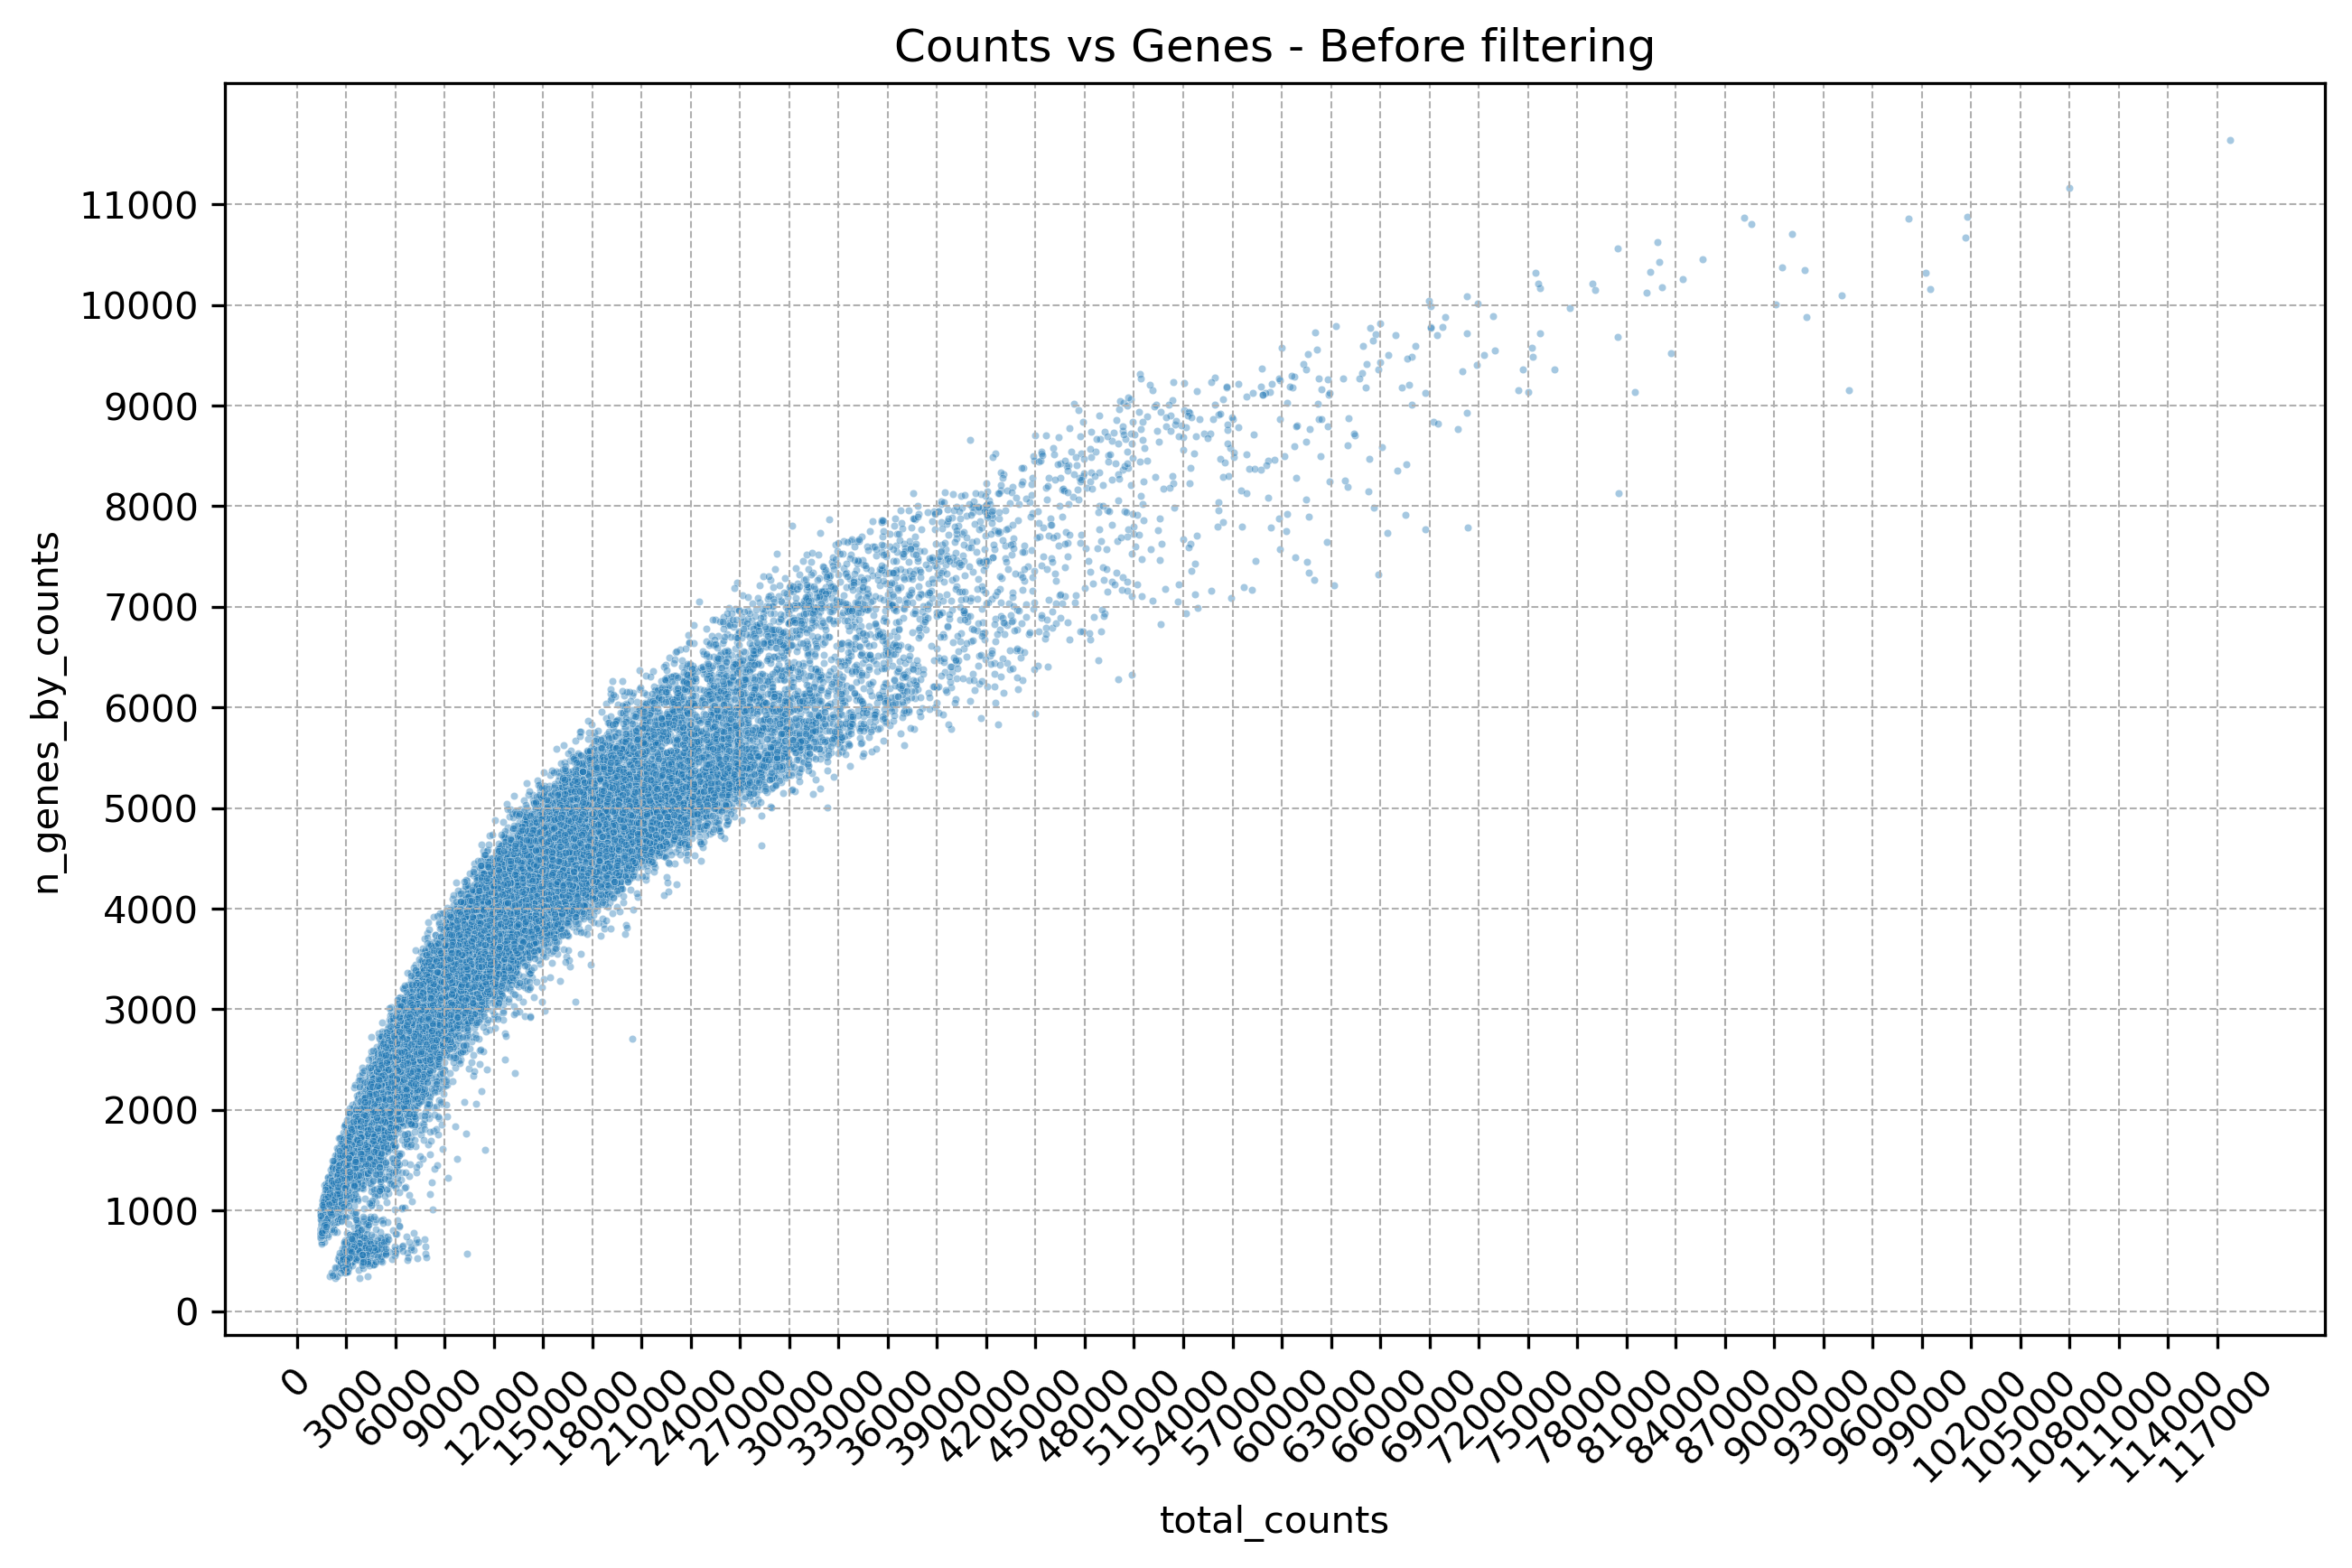

In [15]:
plt.figure(figsize=(10, 6))
sb.scatterplot(data=raw_adata.obs, x='total_counts', y='n_genes_by_counts' , alpha = 0.4, s=4)
plt.xticks(range(0, int(max(raw_adata.obs['total_counts'])) + 1, 3000),rotation=45, fontsize = 10)
plt.yticks(range(0, int(max(raw_adata.obs['n_genes_by_counts'])) + 1, 1000),fontsize = 10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.title(f'Counts vs Genes - Before filtering')
plt.show()

### Filtering based on QC metrics

In [16]:
filtered_object = raw_adata[raw_adata.obs['pct_counts_mt'] < 20]
filtered_object

View of AnnData object with n_obs × n_vars = 39854 × 32285
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_HTO', 'nFeature_HTO', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'ident', 'Sample', 'Sample-ID', 'Mouse-ID', 'Sex', 'Group', 'Ref hashtag', 'Nuclei Purification Method after Hashing', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'X_name'
    layers: 'logcounts'

# Clustering

In [17]:
sc.pp.neighbors(filtered_object)
sc.tl.leiden(filtered_object)
filtered_object

computing neighbors
computing PCA
    with n_comps=50


/home/gruengroup/srivalli/miniconda3/envs/scanpy/lib/python3.13/site-packages/scanpy/tools/_utils.py:41: UserWarning: You’re trying to run this on 32285 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  warnings.warn(


    finished (0:00:38)
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:01:10)
running Leiden clustering


/tmp/ipykernel_1272718/3210525439.py:2: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(filtered_object)


    finished: found 24 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:20)


AnnData object with n_obs × n_vars = 39854 × 32285
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_HTO', 'nFeature_HTO', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'ident', 'Sample', 'Sample-ID', 'Mouse-ID', 'Sex', 'Group', 'Ref hashtag', 'Nuclei Purification Method after Hashing', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'leiden'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'X_name', 'pca', 'neighbors', 'leiden'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'logcounts'
    obsp: 'distances', 'connectivities'

In [18]:
filtered_object

AnnData object with n_obs × n_vars = 39854 × 32285
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_HTO', 'nFeature_HTO', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'ident', 'Sample', 'Sample-ID', 'Mouse-ID', 'Sex', 'Group', 'Ref hashtag', 'Nuclei Purification Method after Hashing', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'leiden'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'X_name', 'pca', 'neighbors', 'leiden'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'logcounts'
    obsp: 'distances', 'connectivities'

In [19]:
filtered_object.obs

,orig.ident,nCount_RNA,nFeature_RNA,nCount_HTO,nFeature_HTO,HTO_maxID,HTO_secondID,HTO_margin,HTO_classification,HTO_classification.global,...,Group,Ref hashtag,Nuclei Purification Method after Hashing,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,leiden
AAACCAAAGCCAGTGT-1,SeuratProject,14083.0,3886,1960.0,8,TotalSeqB4,TotalSeqB9,0.575627,Hash4_Hash9,Doublet,...,NaN,NaN,NaN,3886,14083.0,452.0,3.209543,79.0,0.560960,0
AAACCAAAGGCGTCCA-1,SeuratProject,7966.0,2771,1928.0,8,TotalSeqB4,TotalSeqB9,0.377318,Hash4,Singlet,...,MCMV,TotalSeqB4,Magnetic Beads,2771,7966.0,418.0,5.247301,77.0,0.966608,15
AAACCAAAGGTTAGCC-1,SeuratProject,4451.0,2271,1861.0,8,TotalSeqB3,TotalSeqB6,0.094148,Negative,Negative,...,NaN,NaN,NaN,2271,4451.0,246.0,5.526848,71.0,1.595147,4
AAACCAAAGGTTAGTT-1,SeuratProject,13944.0,4187,1658.0,8,TotalSeqB5,TotalSeqB6,0.270208,Negative,Negative,...,NaN,NaN,NaN,4187,13944.0,302.0,2.165806,90.0,0.645439,2
AAACCAAAGTACCACA-1,SeuratProject,11424.0,3923,1655.0,8,TotalSeqB7,TotalSeqB9,0.107273,Negative,Negative,...,NaN,NaN,NaN,3923,11424.0,235.0,2.057073,72.0,0.630252,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TGTGTTGAGCCTATCT-1,SeuratProject,8738.0,3805,2570.0,8,TotalSeqB7,TotalSeqB8,0.052030,Hash7_Hash8,Doublet,...,NaN,NaN,NaN,3805,8738.0,638.0,7.301442,86.0,0.984207,17
TGTGTTGAGCTAACCA-1,SeuratProject,16178.0,4236,1872.0,8,TotalSeqB4,TotalSeqB8,0.949875,Hash4,Singlet,...,MCMV,TotalSeqB4,Magnetic Beads,4236,16178.0,299.0,1.848189,75.0,0.463593,11
TGTGTTGAGGAGGACC-1,SeuratProject,4898.0,2244,911.0,8,TotalSeqB4,TotalSeqB8,0.164266,Negative,Negative,...,NaN,NaN,NaN,2244,4898.0,258.0,5.267456,49.0,1.000408,1
TGTGTTGAGTACGCAC-1,SeuratProject,5921.0,2736,2001.0,8,TotalSeqB4,TotalSeqB8,0.096781,Hash4,Singlet,...,MCMV,TotalSeqB4,Magnetic Beads,2736,5921.0,213.0,3.597365,58.0,0.979564,1


In [20]:
filtered_object.obs['HTO_classification'].value_counts()

HTO_classification
Negative       17036
Hash4           3366
Hash5           1924
Hash6           1478
Hash1           1456
Hash7           1429
Hash8           1282
Hash3           1232
Hash9            937
Hash3_Hash8      775
Hash4_Hash8      533
Hash5_Hash8      503
Hash7_Hash8      493
Hash1_Hash6      481
Hash4_Hash6      445
Hash1_Hash8      425
Hash8_Hash9      379
Hash4_Hash9      376
Hash1_Hash4      368
Hash6_Hash7      356
Hash1_Hash3      355
Hash1_Hash9      344
Hash6_Hash8      337
Hash1_Hash7      326
Hash3_Hash6      323
Hash1_Hash5      313
Hash5_Hash6      311
Hash3_Hash9      295
Hash6_Hash9      282
Hash5_Hash9      279
Hash7_Hash9      245
Hash3_Hash4      219
Hash3_Hash7      214
Hash4_Hash5      192
Hash4_Hash7      188
Hash3_Hash5      179
Hash5_Hash7      178
Name: count, dtype: int64

In [21]:
filtered_object.obs['leiden'].value_counts()

leiden
0     3400
1     3352
2     3207
3     3159
4     2947
5     2563
6     2105
7     2052
8     2010
9     1963
10    1746
11    1440
12    1344
13    1304
14    1229
15    1213
16    1117
17     929
18     876
19     600
20     580
21     404
22     193
23     121
Name: count, dtype: int64

# Doublet and Negatives Check

In [22]:
doublets = filtered_object[filtered_object.obs['HTO_classification.global'] == 'Doublet'].copy()
doublets

AnnData object with n_obs × n_vars = 9714 × 32285
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_HTO', 'nFeature_HTO', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'ident', 'Sample', 'Sample-ID', 'Mouse-ID', 'Sex', 'Group', 'Ref hashtag', 'Nuclei Purification Method after Hashing', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'leiden'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'X_name', 'pca', 'neighbors', 'leiden'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'logcounts'
    obsp: 'distances', 'connectivities'

In [23]:
doublets.obs['leiden'].value_counts()

leiden
13    925
12    901
0     811
7     773
10    734
2     722
8     565
17    470
1     453
3     401
5     392
15    368
11    333
4     320
6     320
16    252
20    249
9     204
14    196
21    117
18    104
19     71
22     24
23      9
Name: count, dtype: int64

In [24]:
negatives = filtered_object[filtered_object.obs['HTO_classification.global'] == 'Negative'].copy()
negatives

AnnData object with n_obs × n_vars = 17036 × 32285
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_HTO', 'nFeature_HTO', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'ident', 'Sample', 'Sample-ID', 'Mouse-ID', 'Sex', 'Group', 'Ref hashtag', 'Nuclei Purification Method after Hashing', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'leiden'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'X_name', 'pca', 'neighbors', 'leiden'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'logcounts'
    obsp: 'distances', 'connectivities'

In [25]:
negatives.obs['leiden'].value_counts()

leiden
1     2220
4     2012
3     1794
5     1493
9     1358
0     1211
6     1189
2      997
14     739
18     588
15     576
16     525
8      384
11     364
10     326
21     226
19     219
20     204
7      189
22     132
23      91
17      87
12      74
13      38
Name: count, dtype: int64

# Plotting

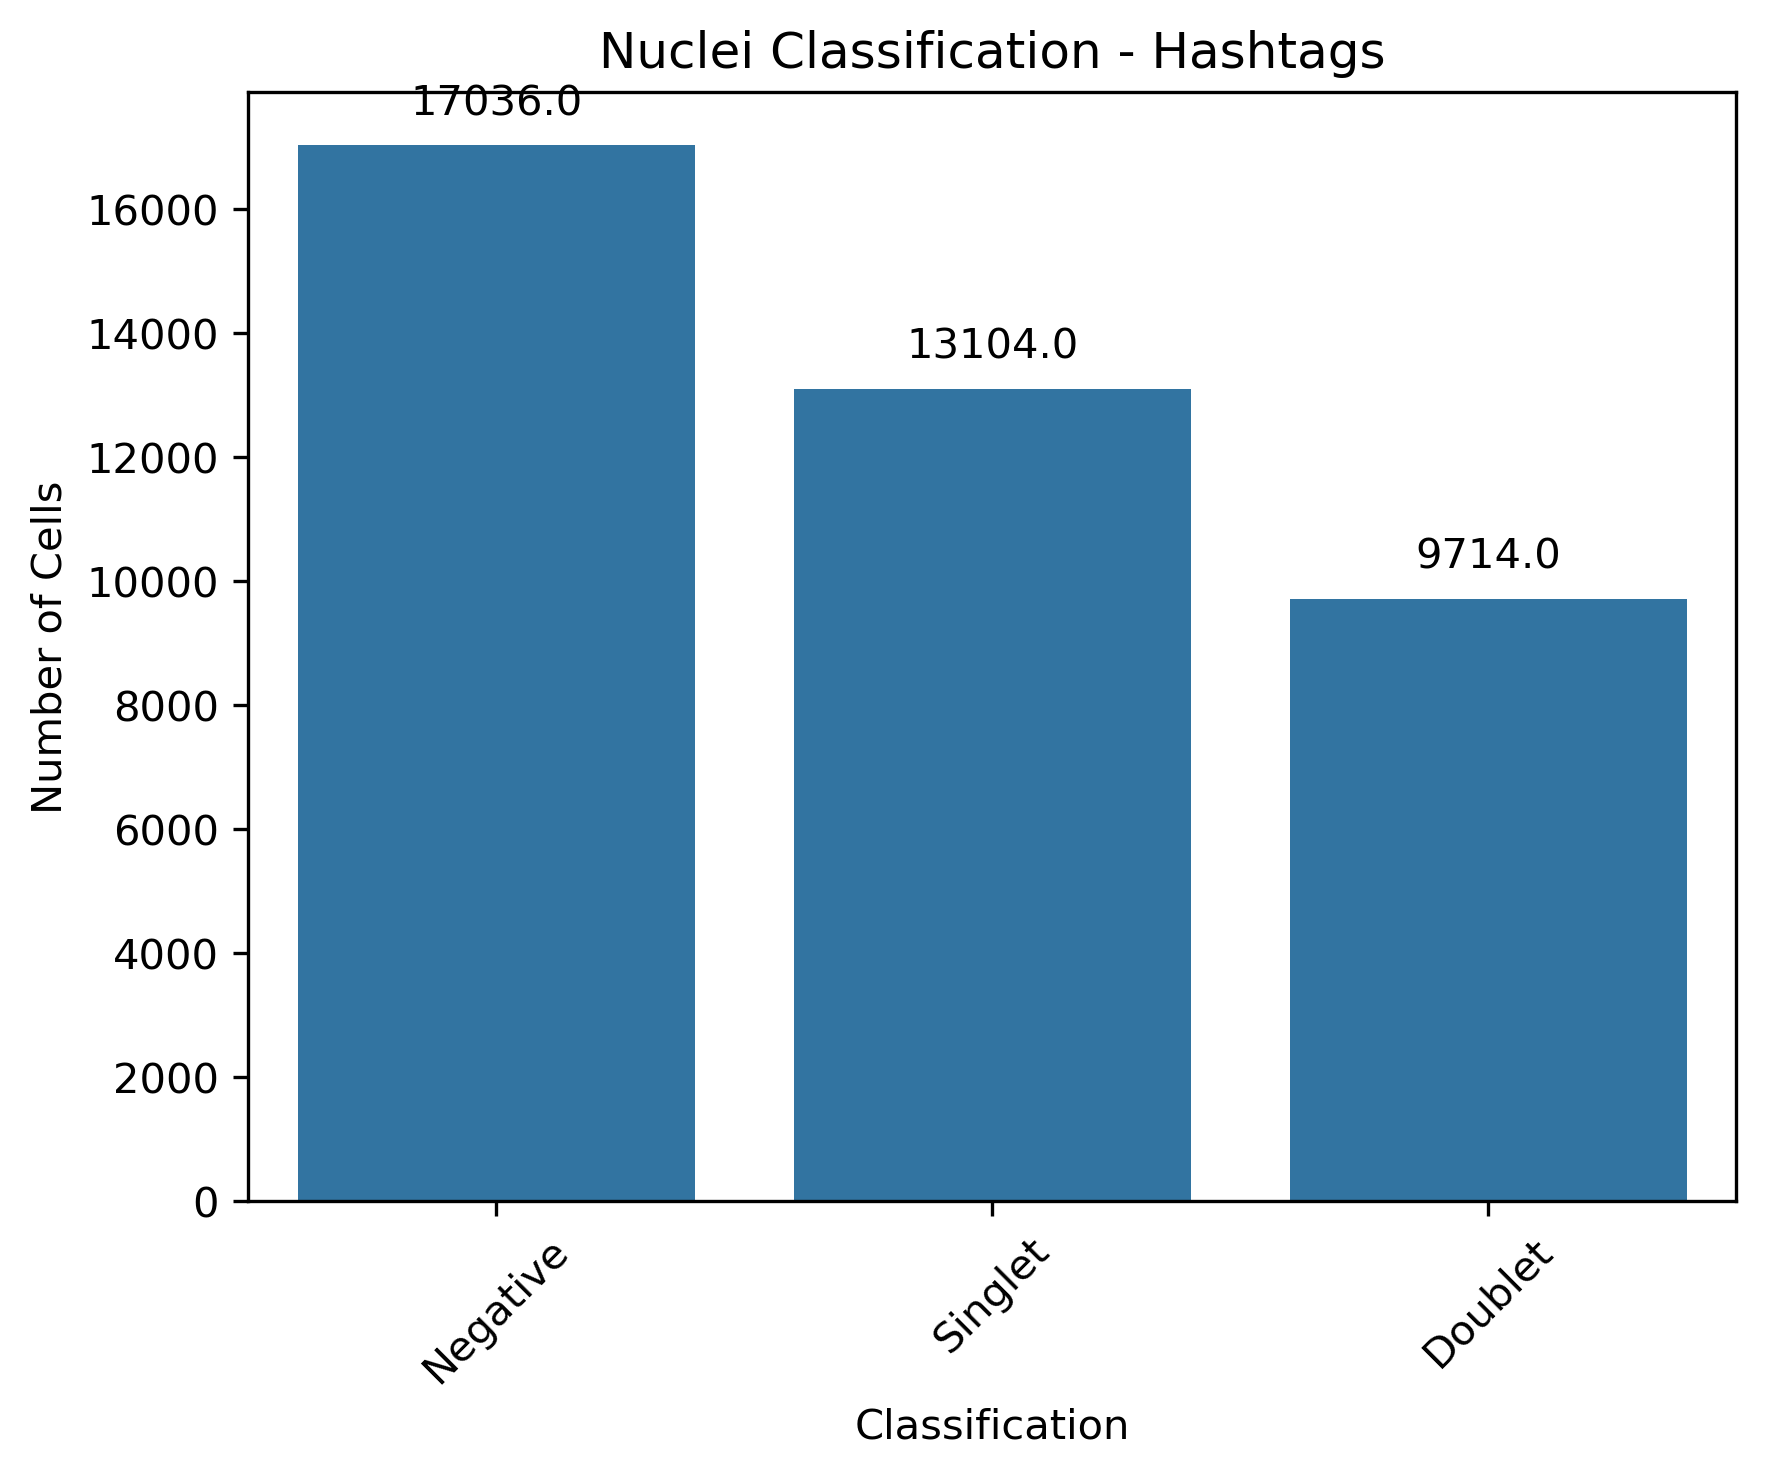

In [26]:
ax = sb.countplot(data=filtered_object.obs, x='HTO_classification.global', order=filtered_object.obs['HTO_classification.global'].value_counts().index)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 10), textcoords='offset points')

plt.title("Nuclei Classification - Hashtags")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel("Classification")
plt.ylabel("Number of Cells")
plt.show()

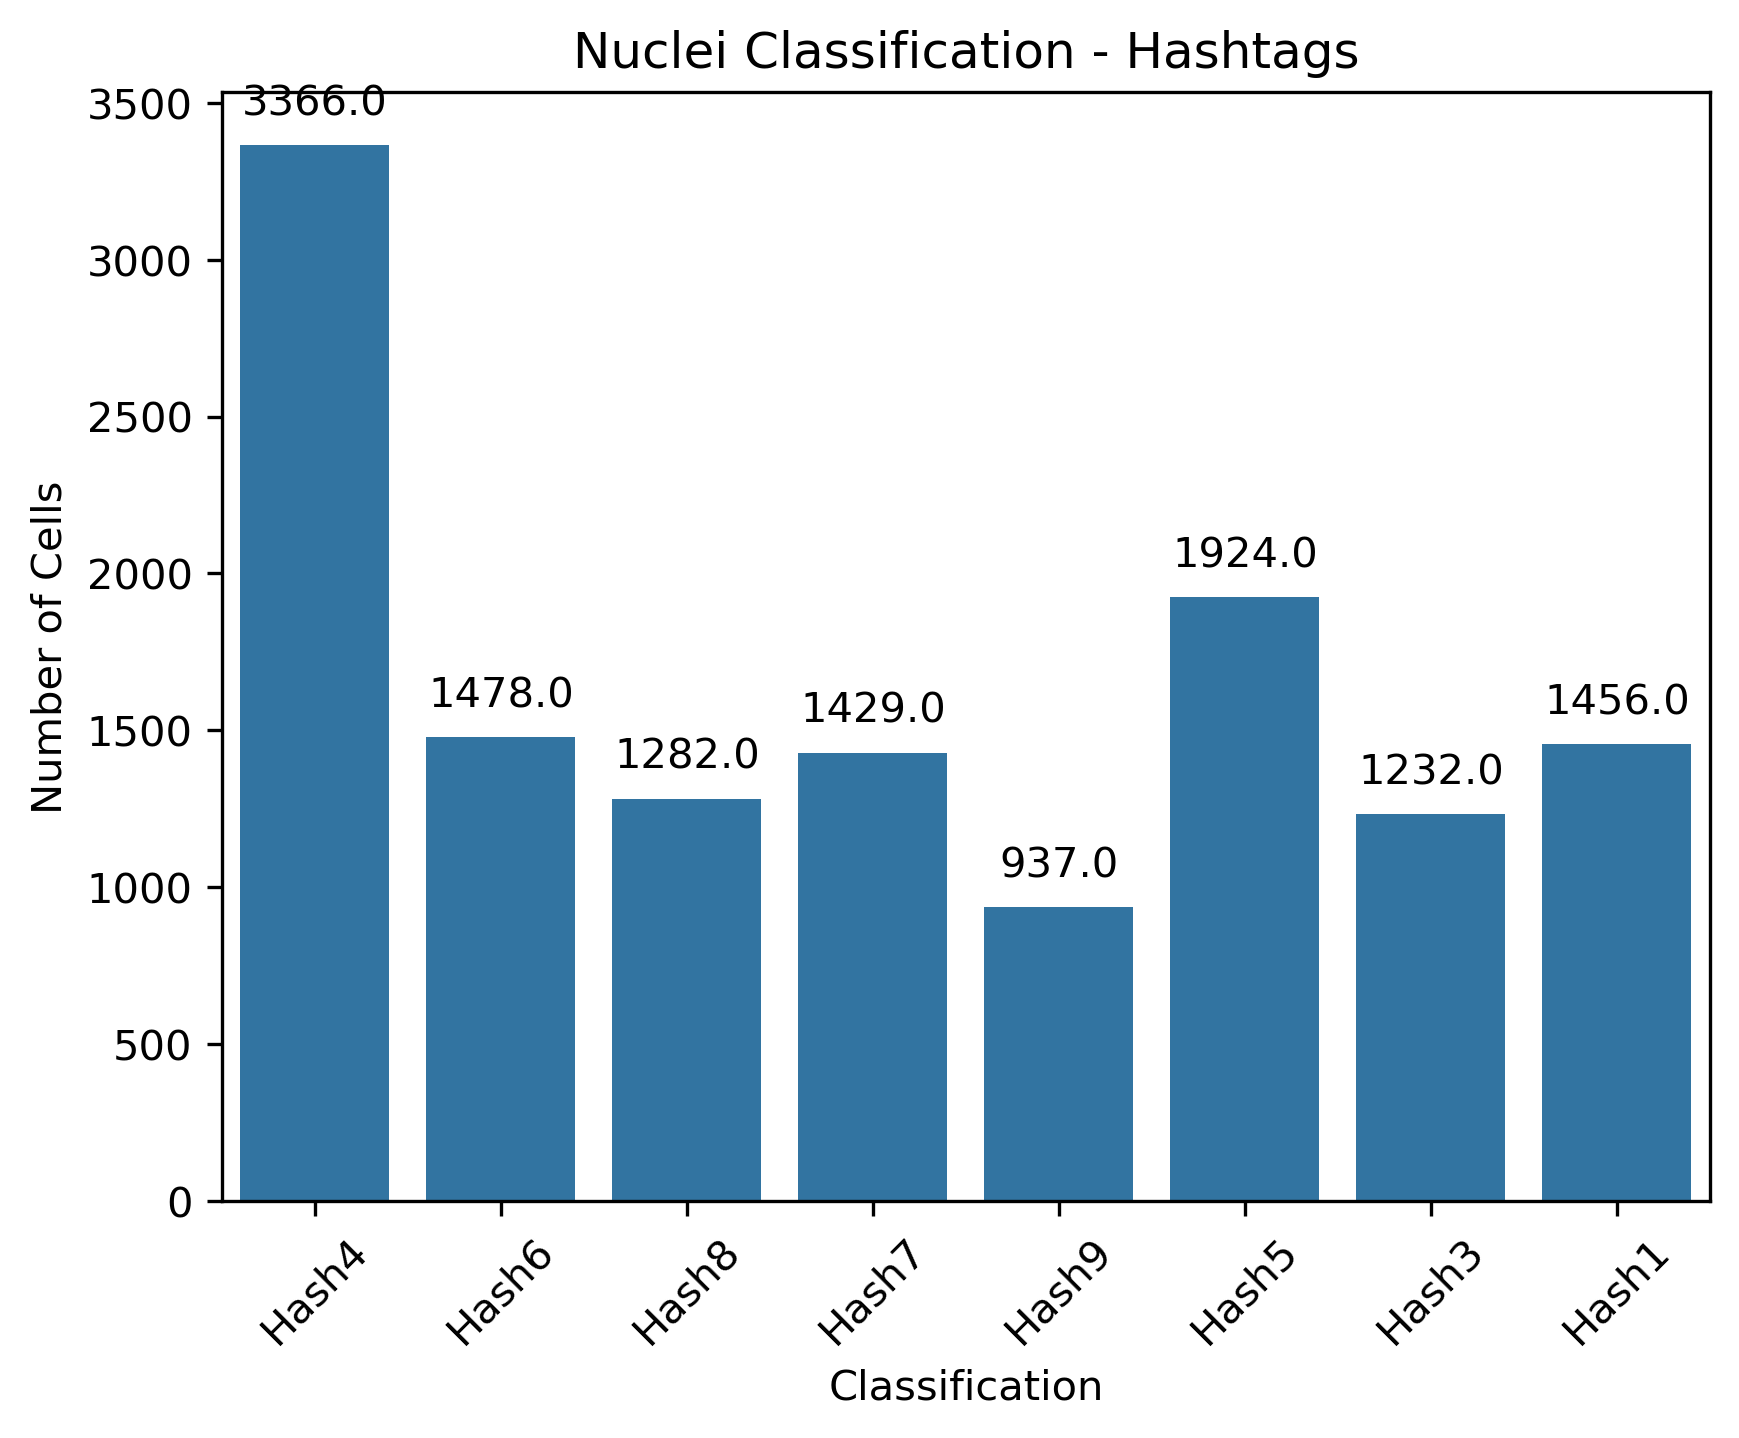

In [27]:
without_doublets = filtered_object[~filtered_object.obs['HTO_classification.global'].isin(['Doublet', 'Negative'])]

ax = sb.countplot(data=without_doublets.obs, x='HTO_classification')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 10), textcoords='offset points')

plt.title("Nuclei Classification - Hashtags")
plt.xticks(rotation=45) 
plt.xlabel("Classification")
plt.ylabel("Number of Cells")
plt.show()

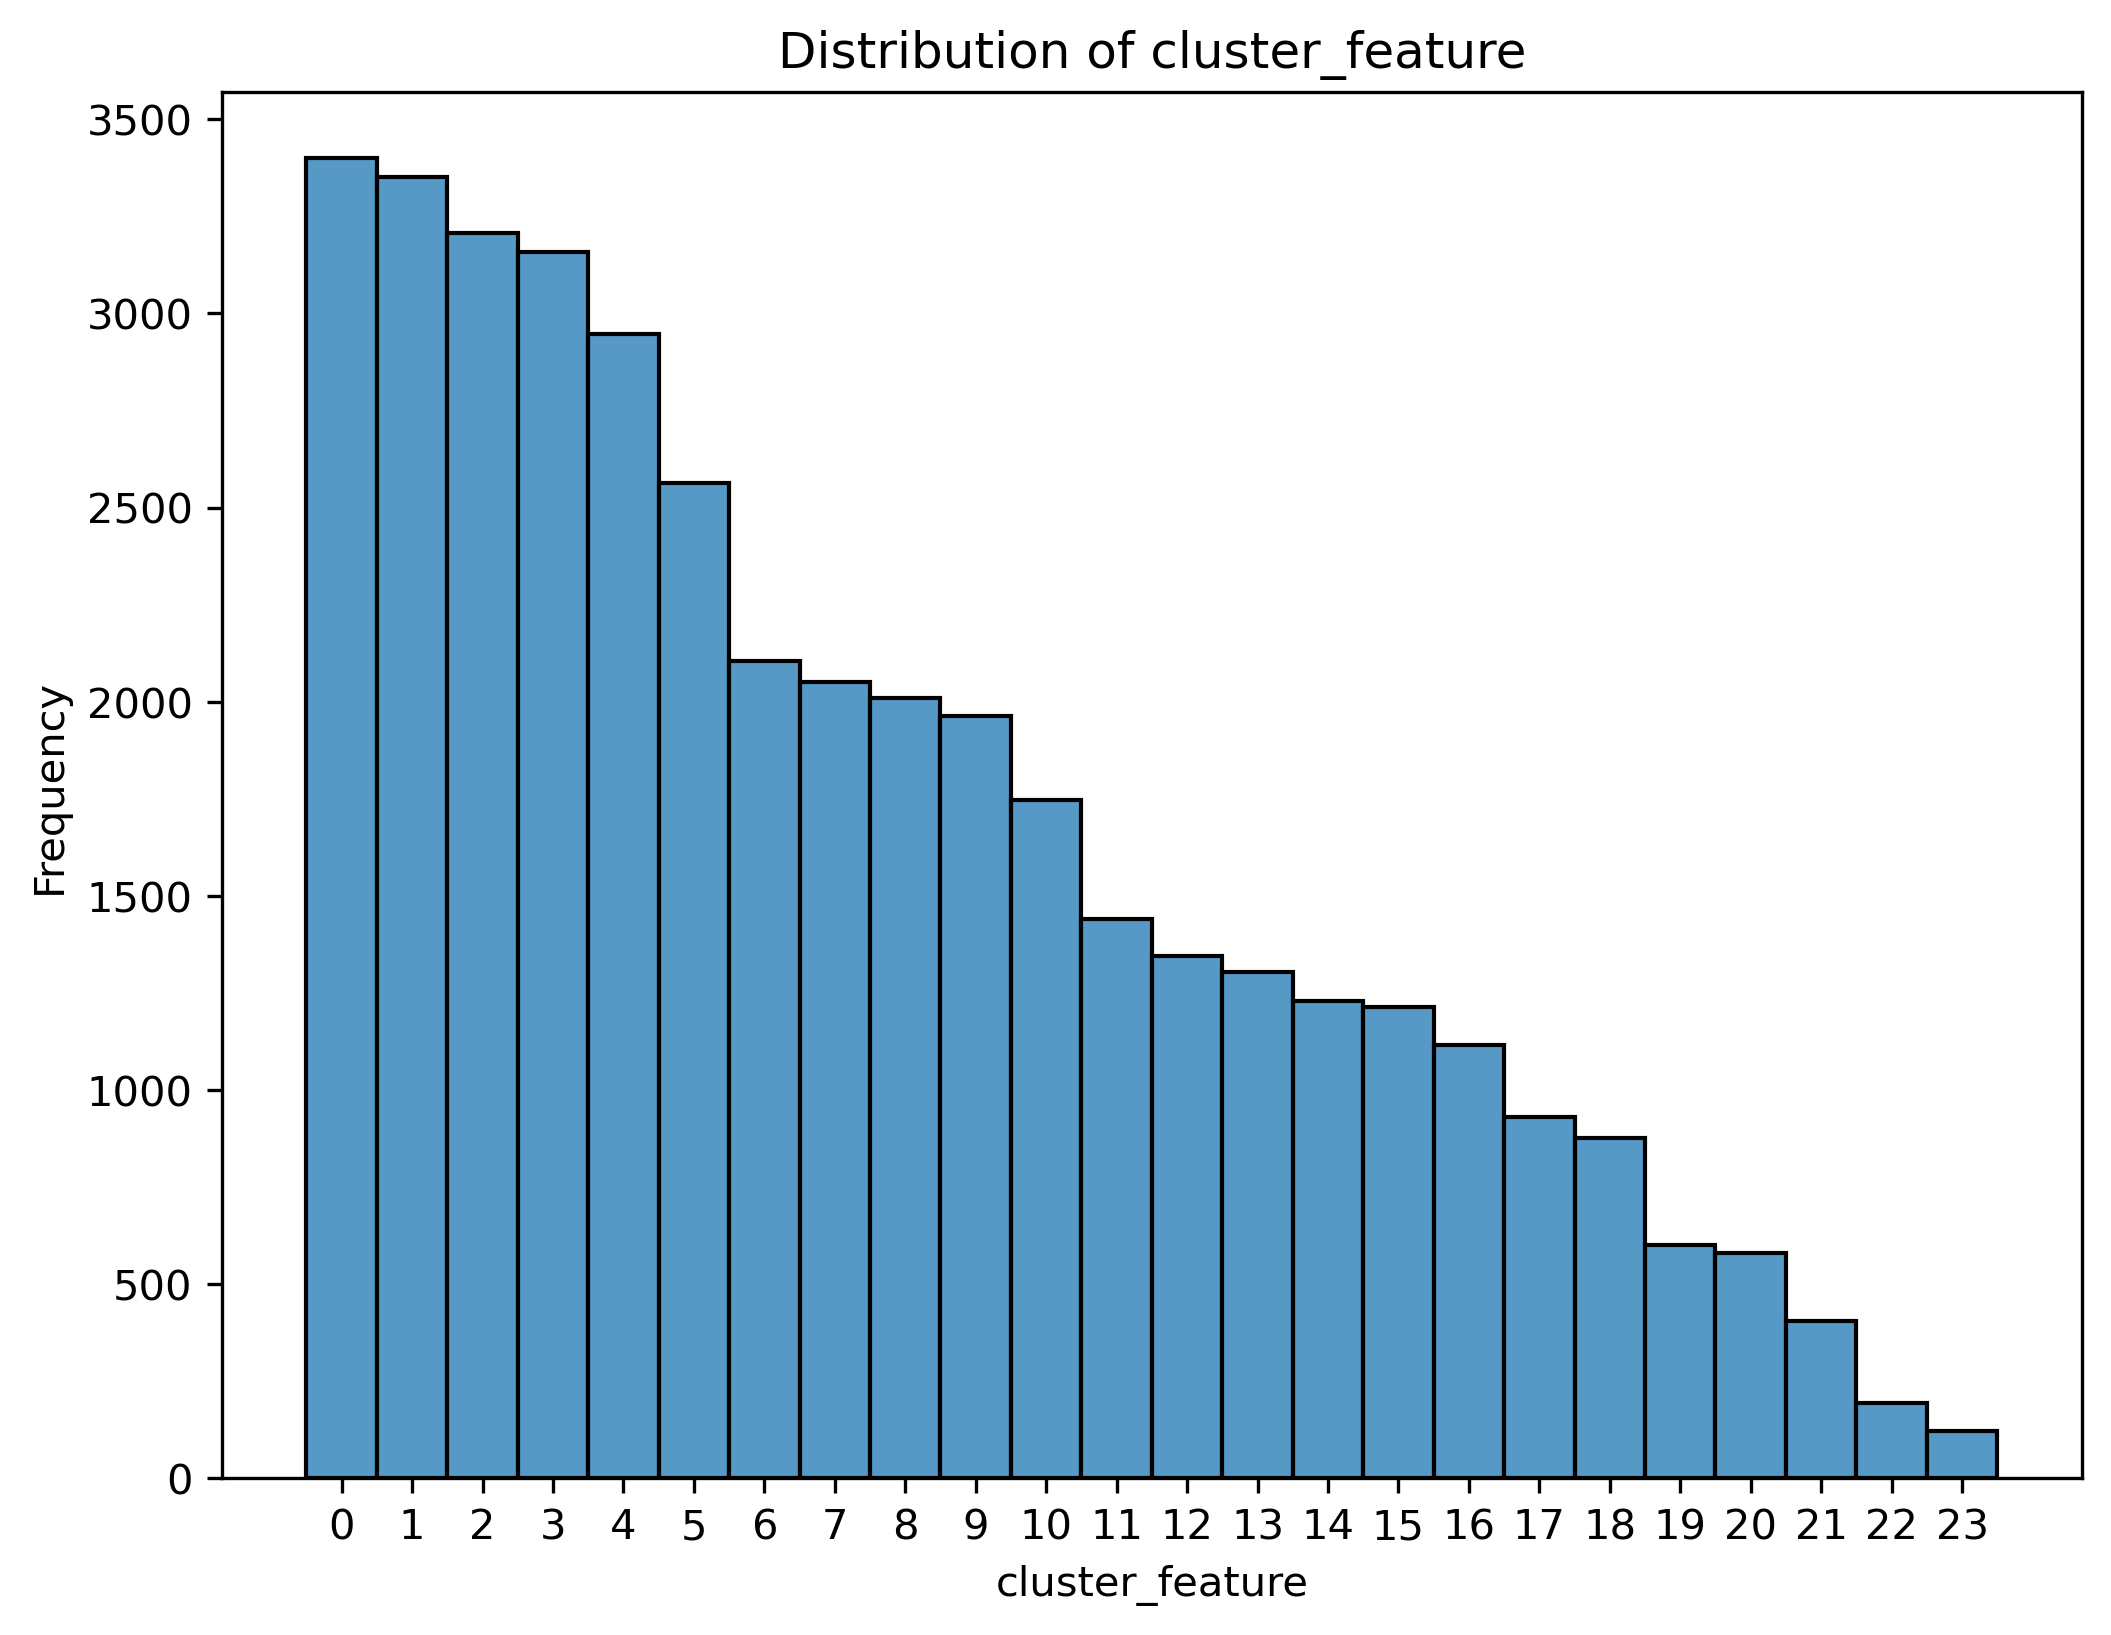

In [28]:
plt.figure(figsize=(8, 6))
sb.histplot(filtered_object.obs['leiden'])
plt.title("Distribution of cluster_feature")
plt.xlabel("cluster_feature")
plt.ylabel("Frequency")
plt.show()

In [29]:
filtered_object.obs

,orig.ident,nCount_RNA,nFeature_RNA,nCount_HTO,nFeature_HTO,HTO_maxID,HTO_secondID,HTO_margin,HTO_classification,HTO_classification.global,...,Group,Ref hashtag,Nuclei Purification Method after Hashing,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,leiden
AAACCAAAGCCAGTGT-1,SeuratProject,14083.0,3886,1960.0,8,TotalSeqB4,TotalSeqB9,0.575627,Hash4_Hash9,Doublet,...,NaN,NaN,NaN,3886,14083.0,452.0,3.209543,79.0,0.560960,0
AAACCAAAGGCGTCCA-1,SeuratProject,7966.0,2771,1928.0,8,TotalSeqB4,TotalSeqB9,0.377318,Hash4,Singlet,...,MCMV,TotalSeqB4,Magnetic Beads,2771,7966.0,418.0,5.247301,77.0,0.966608,15
AAACCAAAGGTTAGCC-1,SeuratProject,4451.0,2271,1861.0,8,TotalSeqB3,TotalSeqB6,0.094148,Negative,Negative,...,NaN,NaN,NaN,2271,4451.0,246.0,5.526848,71.0,1.595147,4
AAACCAAAGGTTAGTT-1,SeuratProject,13944.0,4187,1658.0,8,TotalSeqB5,TotalSeqB6,0.270208,Negative,Negative,...,NaN,NaN,NaN,4187,13944.0,302.0,2.165806,90.0,0.645439,2
AAACCAAAGTACCACA-1,SeuratProject,11424.0,3923,1655.0,8,TotalSeqB7,TotalSeqB9,0.107273,Negative,Negative,...,NaN,NaN,NaN,3923,11424.0,235.0,2.057073,72.0,0.630252,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TGTGTTGAGCCTATCT-1,SeuratProject,8738.0,3805,2570.0,8,TotalSeqB7,TotalSeqB8,0.052030,Hash7_Hash8,Doublet,...,NaN,NaN,NaN,3805,8738.0,638.0,7.301442,86.0,0.984207,17
TGTGTTGAGCTAACCA-1,SeuratProject,16178.0,4236,1872.0,8,TotalSeqB4,TotalSeqB8,0.949875,Hash4,Singlet,...,MCMV,TotalSeqB4,Magnetic Beads,4236,16178.0,299.0,1.848189,75.0,0.463593,11
TGTGTTGAGGAGGACC-1,SeuratProject,4898.0,2244,911.0,8,TotalSeqB4,TotalSeqB8,0.164266,Negative,Negative,...,NaN,NaN,NaN,2244,4898.0,258.0,5.267456,49.0,1.000408,1
TGTGTTGAGTACGCAC-1,SeuratProject,5921.0,2736,2001.0,8,TotalSeqB4,TotalSeqB8,0.096781,Hash4,Singlet,...,MCMV,TotalSeqB4,Magnetic Beads,2736,5921.0,213.0,3.597365,58.0,0.979564,1


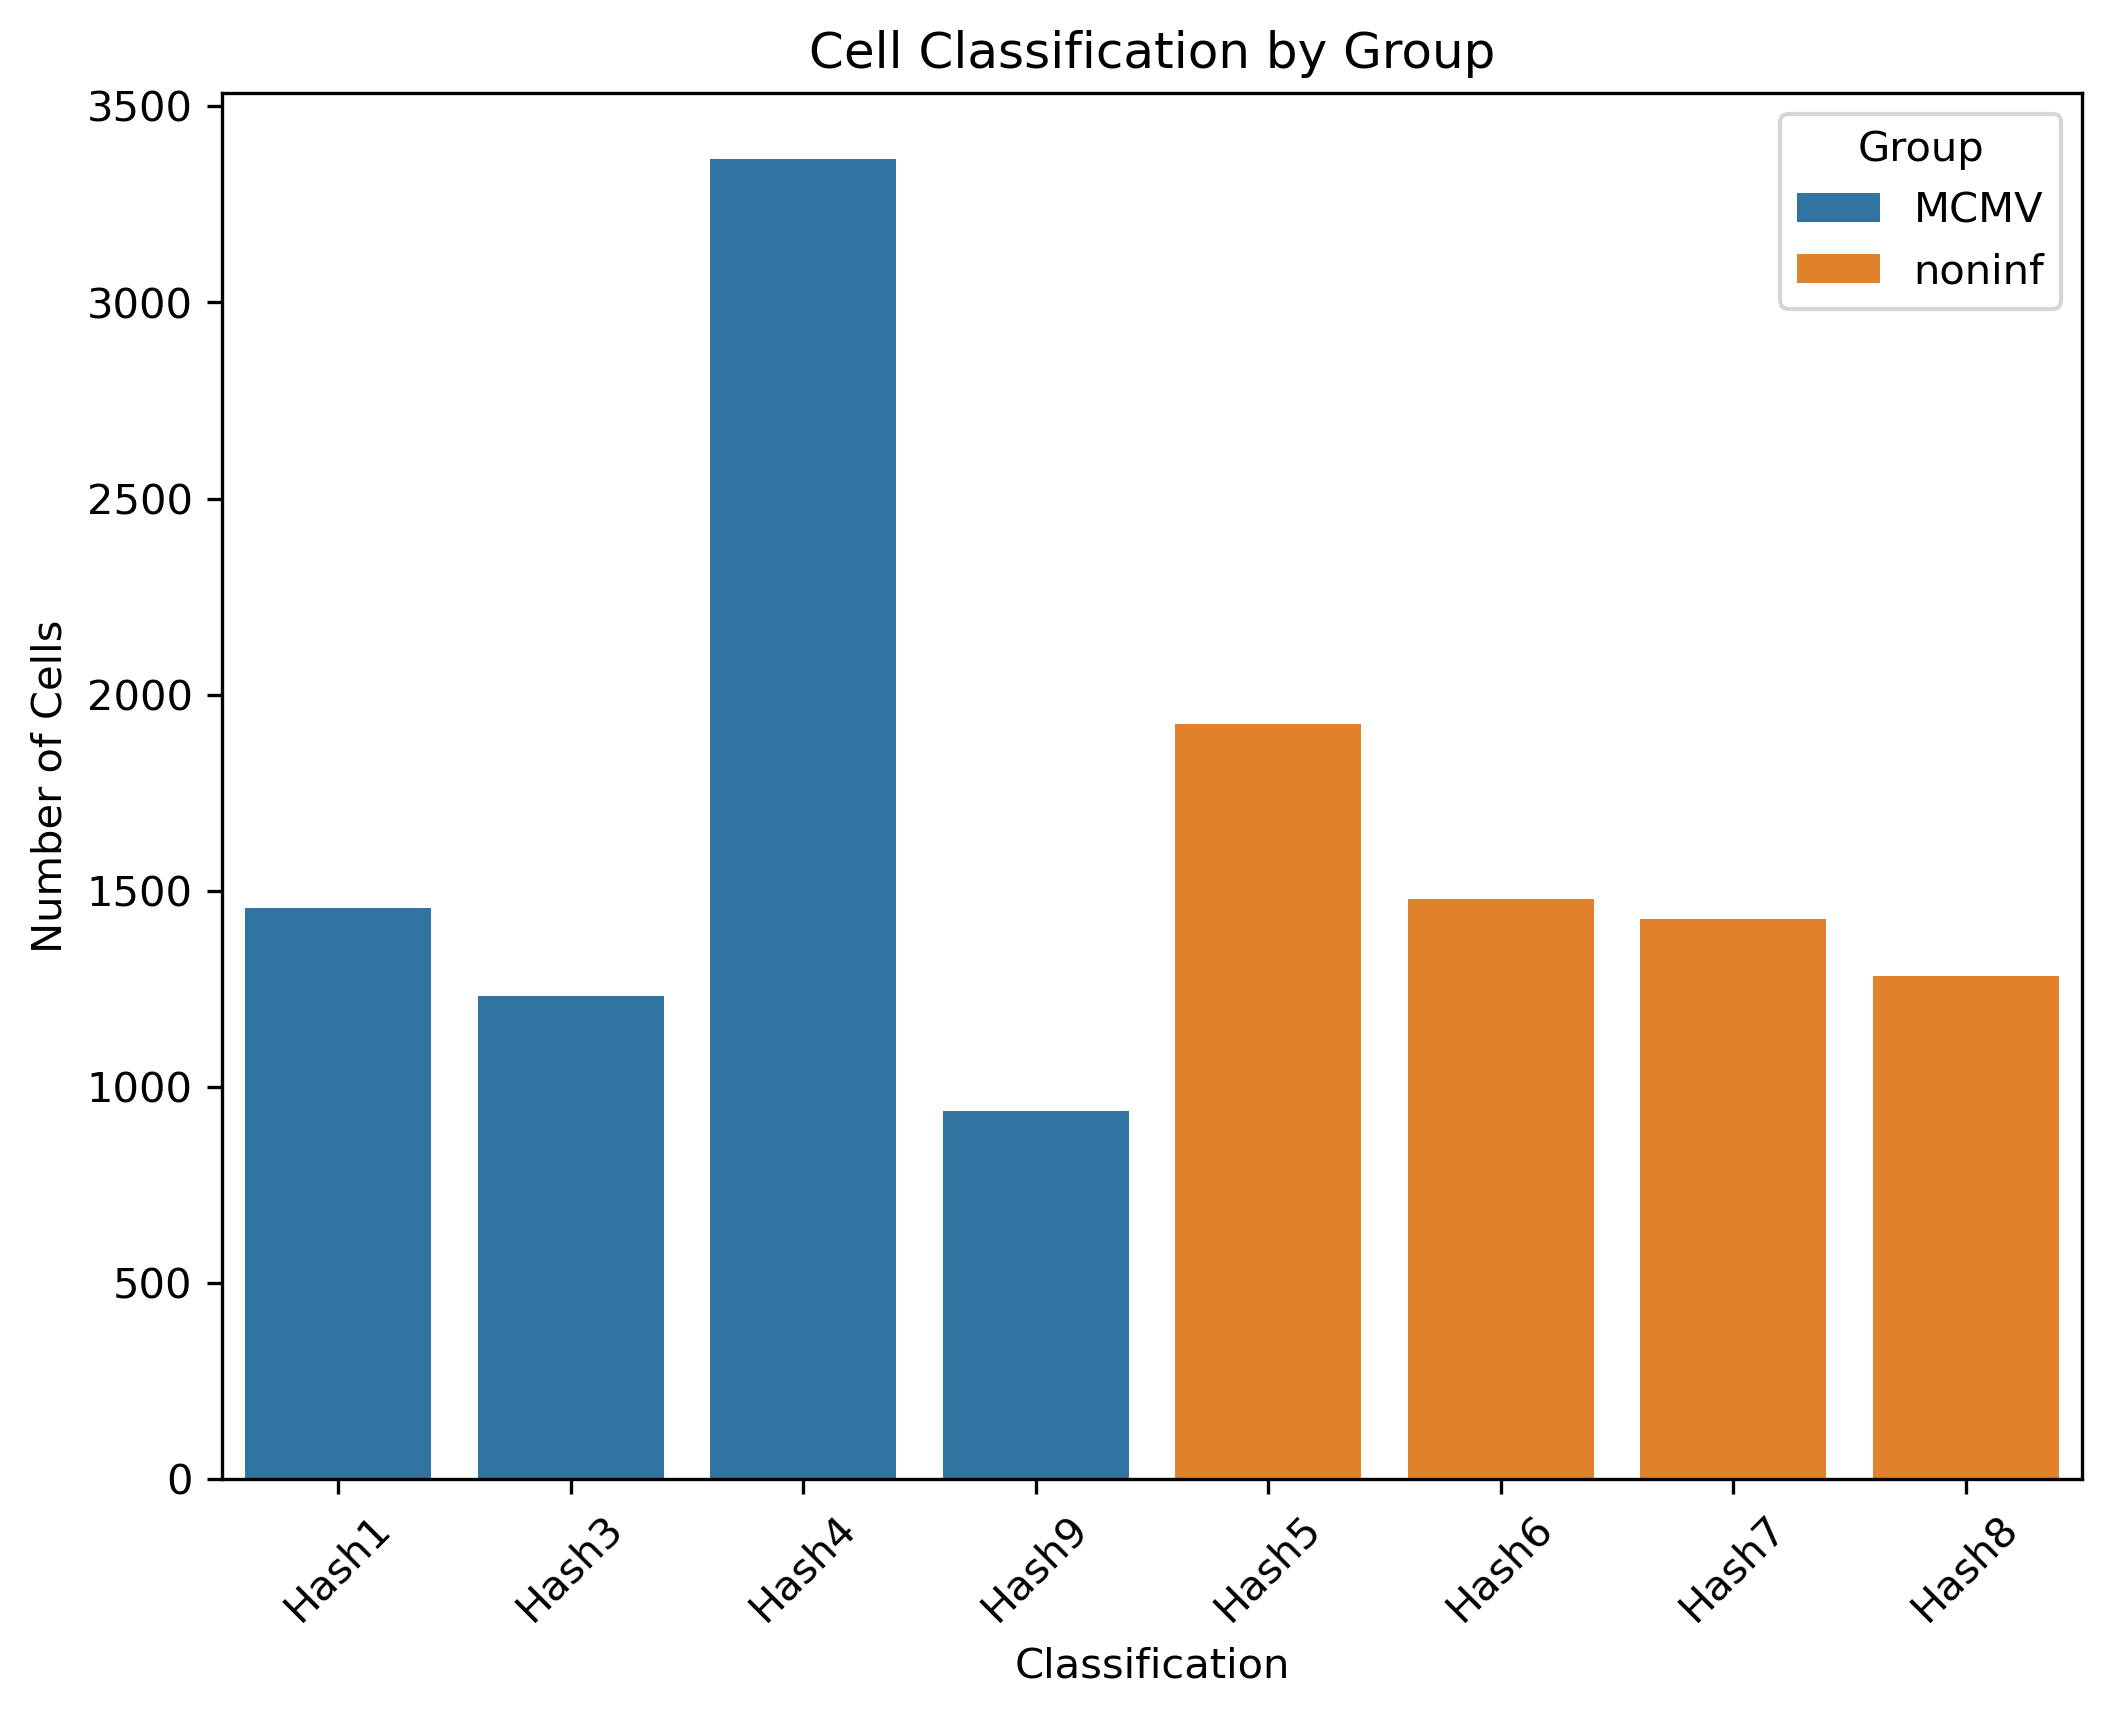

In [30]:
plt.figure(figsize=(8, 6))
sb.countplot(data=without_doublets.obs, x='HTO_classification', hue='Group',order= ['Hash1','Hash3','Hash4','Hash9','Hash5','Hash6','Hash7','Hash8'])
plt.title("Cell Classification by Group")
plt.xlabel("Classification")
plt.ylabel("Number of Cells")
plt.xticks(rotation=45)
plt.show()

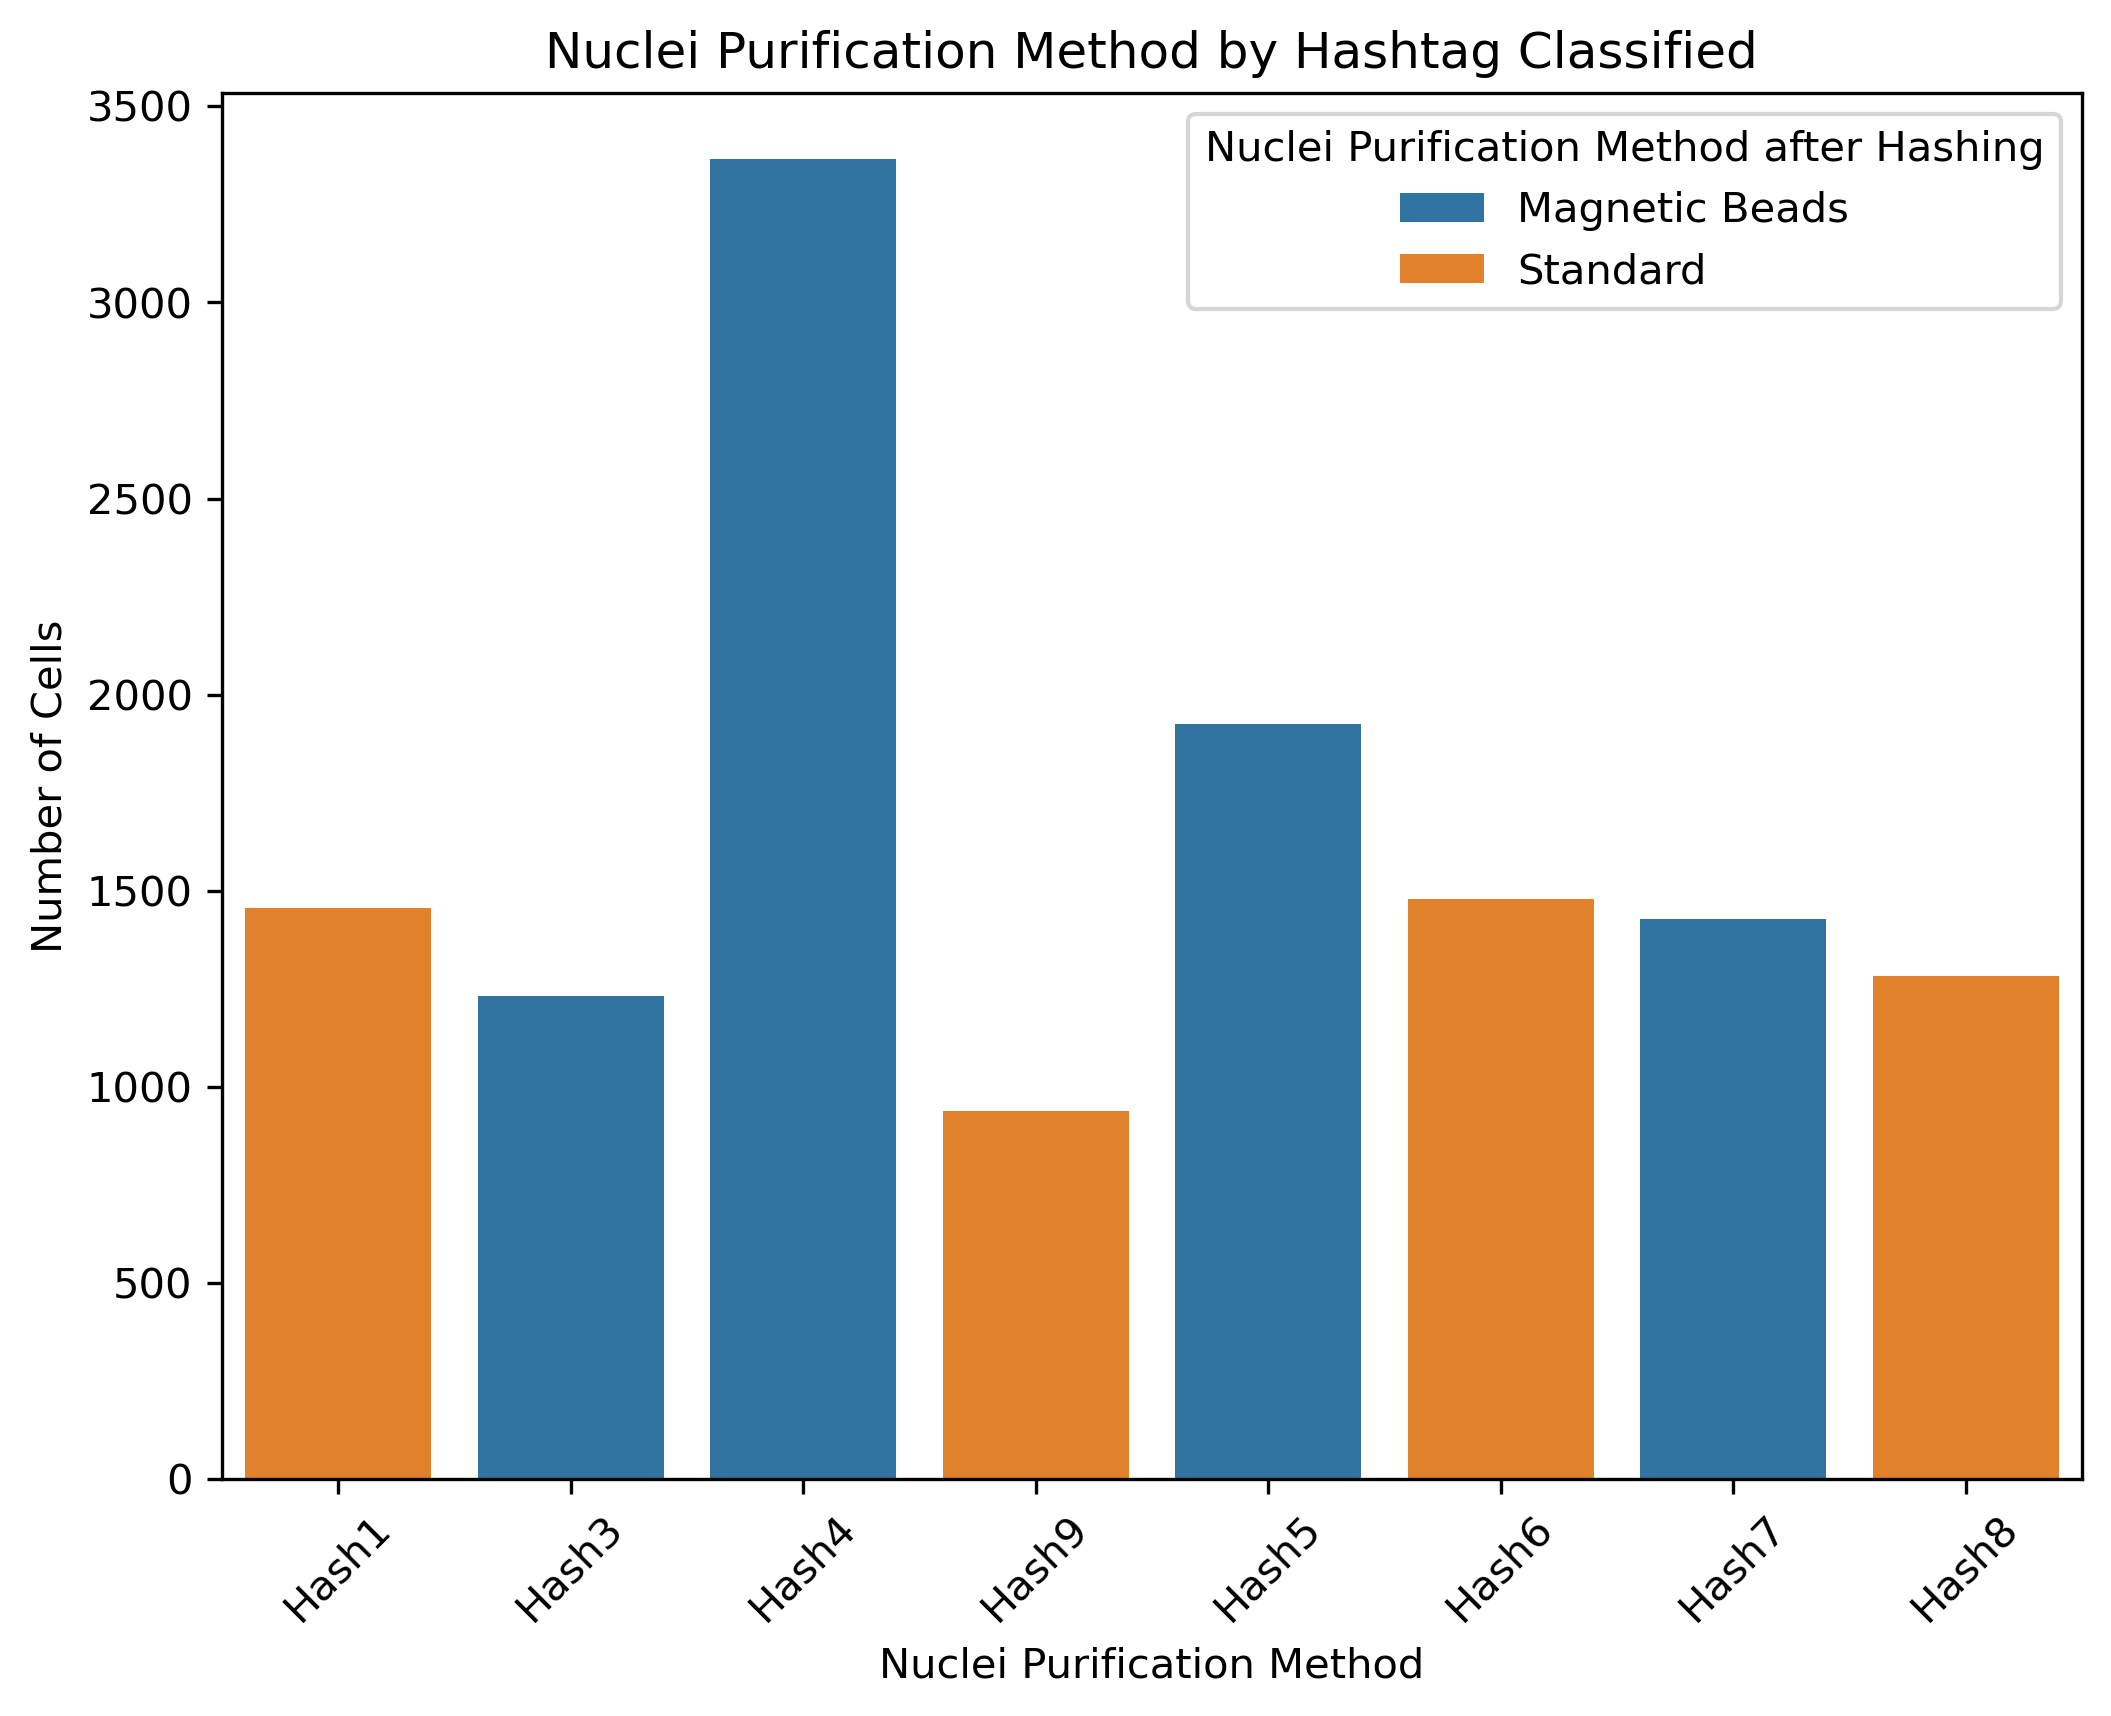

In [31]:
plt.figure(figsize=(8, 6))
sb.countplot(data=without_doublets.obs, hue='Nuclei Purification Method after Hashing',  x='HTO_classification', order= ['Hash1','Hash3','Hash4','Hash9','Hash5','Hash6','Hash7','Hash8'])
plt.title("Nuclei Purification Method by Hashtag Classified")
plt.xlabel("Nuclei Purification Method")
plt.ylabel("Number of Cells")
plt.xticks(rotation=45)
plt.show()

## Data Export

In [32]:
filtered_object.obs.dtypes

orig.ident                                  category
nCount_RNA                                   float64
nFeature_RNA                                   int32
nCount_HTO                                   float64
nFeature_HTO                                   int32
HTO_maxID                                   category
HTO_secondID                                category
HTO_margin                                   float64
HTO_classification                            object
HTO_classification.global                   category
hash.ID                                     category
ident                                       category
Sample                                        object
Sample-ID                                    float64
Mouse-ID                                      object
Sex                                           object
Group                                         object
Ref hashtag                                   object
Nuclei Purification Method after Hashing      

In [34]:
filtered_object.write_h5ad(f'./Github/Nuclear_hashing_2025/data/demultiplexed_HTODemux_raw_{timestamp}.h5ad')